# SPRING 2021
# Applied Machine Learning, Test 1

**Problem 1** 
1. Run the code cell below to download data for this problem (do not make any changes to the content of the cell!). This creates two NumPy arrays `x_poly` and `y_poly` storing the problem's data.

In [32]:
import numpy as np
import requests
import io

def download_np(fname):
  response = requests.get(f'https://raw.githubusercontent.com/graf10a/Applied-Machine-Learning-Course/main/Data/{fname}')
  response.raise_for_status()
  return np.load(io.BytesIO(response.content))

x_poly = download_np('x_poly.npy')
y_poly = download_np('y_poly.npy')

2. Explore the NumPy arrays `x_poly` and `y_poly` downloaded in the previous step. More specifically,
  * print to the screen the shapes of these arrays,
  * check the data types of the arrays, 
  * count the number of missing values in the arrays.

  The messages printed to the screen must be self-explanatory and created using f-string literals. For example, the first message may look something like this: "The shape of 'x_poly' is ???.", where ??? stands for the actual shape of the array.

In [42]:
print('The shape of x_poly is ', x_poly.shape, '\n')
print('The shape of y_poly is ', y_poly.shape, '\n')
print('The type of x_poly is ', type(x_poly), '\n')
print('The type of y_poly is ', type(y_poly), '\n')
mask_x = np.isnan(x_poly)
mask_y = np.isnan(y_poly)
print('The number of missing values in x_poly is ', np.count_nonzero(x_poly[mask_x]))
print('The number of missing values in y_poly is ', np.count_nonzero(y_poly[mask_y]))
print('The indices of the missing values in y_poly is ', np.argwhere(np.isnan(y_poly)))

The shape of x_poly is  (300,) 

The shape of y_poly is  (300,) 

The type of x_poly is  <class 'numpy.ndarray'> 

The type of y_poly is  <class 'numpy.ndarray'> 

The number of missing values in x_poly is  0
The number of missing values in y_poly is  11
The indices of the missing values in y_poly is  [[  0]
 [ 50]
 [ 52]
 [133]
 [146]
 [153]
 [172]
 [204]
 [241]
 [260]
 [276]]


3. In what follows, `x_poly` is going to play the role of the features, and `y_poly` is going to play the role of the labels. If you found any missing values in the previous step, remove the correspodning feature-label pairs and save the resulting arrays as 'x_poly_clean' and 'y_poly_clean`. If you have not found any missing values then keep searching!

In [43]:
y_poly_clean = np.delete(y_poly, np.argwhere(np.isnan(y_poly)))
#find indices that correspond to nan values in x and remove them
x_poly_clean = np.delete(x_poly, np.argwhere(np.isnan(y_poly)))


4. Demonstrate the result of your work by printing to the screen the new shapes of the arrays and the number of missing values (you can simply copy and paste the code that you used to created similar messages in step 2 and then edit the names of the arrays).

In [44]:
print(y_poly_clean.shape)
print(x_poly_clean.shape)
mask_x_clean = np.isnan(x_poly_clean)
mask_y_clean = np.isnan(y_poly_clean)
print('The number of missing values in x_poly is ', np.count_nonzero(x_poly_clean[mask_x_clean]))
print('The number of missing values in y_poly is ', np.count_nonzero(y_poly_clean[mask_y_clean]))

(289,)
(289,)
The number of missing values in x_poly is  0
The number of missing values in y_poly is  0


5. Print to the screen the largest and the smallest values in each of the arrays (use the versions with no missing values). The messages printed to the screen must be self-explanatory and created using f-string literals. For example, the first message may look something like this: "The largest value in 'x_poly_clean' is ???.", where ??? stands for the actual largest value (it is okay to keep only 3 decimals but it is not a requirement).

In [45]:
print('the largest value in x_poly_clean is ', x_poly_clean.max())
print('the largest value in y_poly_clean is ', y_poly_clean.max())
print('the smallest value in x_poly_clean is ', x_poly_clean.min())
print('the smallest value in y_poly_clean is ', y_poly_clean.min())

the largest value in x_poly_clean is  1000.0
the largest value in y_poly_clean is  12.981480804558183
the smallest value in x_poly_clean is  -1000.0
the smallest value in y_poly_clean is  -11.053189639085783


6. Build a scikit-learn pipeline called `pipe_poly` containing the following steps: 
  * Creating new polynomial features of up to 10th degree (do not include the 0th degree feature).
  * Scaling the data using the standard scaler method. 
  * Fitting a Ridge regression model with $\alpha=0.5$.

  Name these steps `'poly_10'`, `'scaler'`, and `'ridge'`, respectively. Then fit this pipeline on the `x_poly_clean` and `y_poly_clean` data treating the former as a features variable and the latter as a label variable.

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge

pipe_poly = Pipeline([
                      ('poly_10', PolynomialFeatures(degree=10, include_bias=False)),
                      ('scaler', StandardScaler()),
                      ('ridge', Ridge(alpha=0.5))
])
x_poly_clean = x_poly_clean.reshape(-1,1)
y_poly_clean = y_poly_clean.reshape(-1,1)
pipe_poly.fit(x_poly_clean,y_poly_clean)

Pipeline(memory=None,
         steps=[('poly_10',
                 PolynomialFeatures(degree=10, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=0.5, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

7. Create a scatter plot showing the data points (plot the `y_poly_clean` values on the vertical and the `x_poly_clean` values on the horizonatal axis). Label your horizontal and vertical axes as "X" and "Y", respectively, using a fontsize of 12. Add a title to the plot saying "10th degree fit" (set the fontsize parameter to 14). Set the `figsize` parameter of `plt.figure` to `(5, 5)`. Now add your best fit polynomial curve to this graph. To do that:
  * Use `np.linspace` to create an array of 100 evenly spaced values between the largest and the smallest values of `x_poly_clean` (make the limiting values inclusive); call this array `x_poly_grid`.
  * Predict the label values on `x_poly_grid` using your pipeline. Save the result as `y_poly_pred`.
  * On the same graph, plot `y_poly_pred` versus `x_poly_grid` (use the red color and set the `linewidth` parameter of the `plot` function to 3). This is your best fit polynomial.

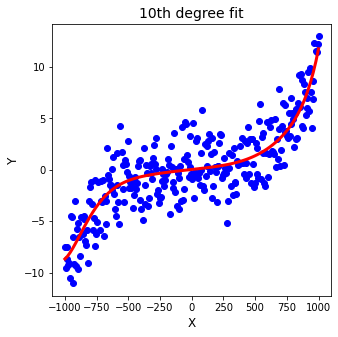

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(x_poly_clean,y_poly_clean,'bo')
plt.xlabel('X',fontsize=12)
plt.ylabel('Y',fontsize=12)
plt.title('10th degree fit',fontsize=14)
x_poly_grid = np.linspace(x_poly_clean.min(),x_poly_clean.max(),num=100)
y_poly_pred = pipe_poly.predict(x_poly_grid.reshape(-1,1))
plt.plot(x_poly_grid,y_poly_pred,color='red',linewidth=3)

**Problem 1** 
1. Run the code cell below to download data for this problem (do not make any changes to the content of the cell!). This creates two NumPy arrays `x_lin` and `y_lin` storing the problem's data.

In [59]:
x_lin = download_np('x_lin.npy')
y_lin = download_np('y_lin.npy')

2. Demonstrate that there are no missing values in these data and that the elements of `x_lin` are between $0$ and $1$ (so that there is no need to re-scale it).

In [83]:
mask_1 = np.isnan(x_lin)
mask_2 = np.isnan(y_lin)
print('The number of missing values in x_lin is ', np.count_nonzero(x_lin[mask_1]))
print('The number of missing values in y_lin is ', np.count_nonzero(y_lin[mask_2]))

print('max value for x_lin is ',x_lin.max(), ' the min value is ', x_lin.min())
print('max value for y_lin is ',y_lin.max(), ' the min value is ', y_lin.min())

The number of missing values in x_lin is  0
The number of missing values in y_lin is  0
max value for x_lin is  1.0  the min value is  0.0
max value for y_lin is  1.5049408165755558  the min value is  -10.177692487832717


3. Imagine that you would like to fit this data with a straight line. Use a for-loop to iterrate over the following list of slope values: $[-16, -12, -8, -4, 0, 4, 8, 12, 16]$ keeping the vertical intercept always equal to $0$. For each of these slope values, 
  * compute the predicted values `y_lin_pred`,
  * compute the $\text{RMSE}$ value,
  * print the results to the screen in the form of the following sentence: "Slope: ???; RMSE: ???", where, as usual, the ??? parts must be replaced with the actual slope and $\text{RMSE}$ values (it is allowed but not required to keep only 3 decimals).

In [93]:
from sklearn.metrics import mean_squared_error
for i in [-16,-12,-8,-4,0,4,8,12,16]:
  y_lin_pred = pipe_poly.predict(x_lin.reshape(-1,1))
  rmse = mean_squared_error(y_lin,y_lin_pred,squared=False)
  print(f'Slope:{i}, RMSE:{rmse}')


Slope:-16, RMSE:5.170268369326741
Slope:-12, RMSE:5.170268369326741
Slope:-8, RMSE:5.170268369326741
Slope:-4, RMSE:5.170268369326741
Slope:0, RMSE:5.170268369326741
Slope:4, RMSE:5.170268369326741
Slope:8, RMSE:5.170268369326741
Slope:12, RMSE:5.170268369326741
Slope:16, RMSE:5.170268369326741


4. Based on your results, which one of these slopes is the best and why? Type your answer in the text cell below.

** **bold text**Answer:**
the best slope is the slope with the smallest RMSE value


5. Starting with a slope of $2$ and keeping the vertical intercept equal zero, perform two steps of gradient descent using a learing rate of 0.9. For each step, print to the screen the updated value of the slope. As usual, it is allowed but not required to show only 3 decimals. Save all three slopes (including the initial one) as elements of a list called `slopes`. 

In [ ]:
slopes = [3]
slope = 2
slopes[0] = slope
slope = 2/x_lin.size * slope
slopes[1] = slope

print(slope)

slope = 2/x_lin.size * slope
slopes[1] = slope
print(slope)

6. Create a scatter plot showing the data points (plot the `y_lin` values on the vertical and the `x_lin` values on the horizonatal axis). Label your horizontal and vertical axes as "X" and "Y", respectively, using a fontsize of 12. Add a title to the plot saying "Linear fit" (set the fontsize parameter to 14). Set the `figsize` parameter of `plt.figure` to `(5, 5)`. Now add three fit lines to this graph. To do that:
  * Use `np.linspace` to create an array of 100 evenly spaced values between zero and one (make the limiting values inclusive); call this array `x_lin_grid`.
  * For each of the three slopes found in the previous item, compute the vertical coordinates for each element of `x_poly_grid` (assume zero vertical intercept). Save the results as `y_lin_pred_0`, `y_lin_pred_1`, and `y_lin_pred_2`.
  * On the same graph, plot `y_lin_pred_0`, `y_lin_pred_1`, and `y_lin_pred_2` versus `x_lin_grid`. When plotting, use three different colors (e.g., green, blue, and red) and set the `linewidth` parameter of the `plot` function to 3. This are your fit lines.
  
   What do you see? Do the fit lines seem to be moving in the right direction?

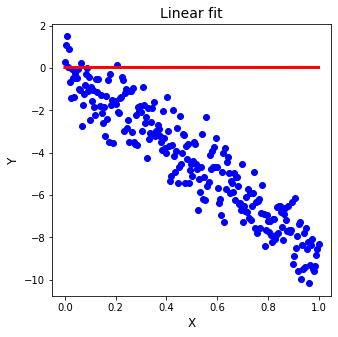

In [104]:
plt.figure(figsize=(5,5))
plt.plot(x_lin,y_lin,'bo')
plt.xlabel('X',fontsize=12)
plt.ylabel('Y',fontsize=12)
plt.title('Linear fit', fontsize=14)
x_lin_grid = np.linspace(x_lin.min(),x_lin.max(),num=100)
y_lin_pred = pipe_poly.predict(x_lin_grid.reshape(-1,1))
plt.plot(x_lin_grid,y_lin_pred,color='red',linewidth=3)

**Problem 3**

1. Set a NumPy random seed to 42 using `np.random.seed(42)`. Immediately after that create a NumPy array called `r_int` containing one million random integers pulled from a uniform distribution of integer numbers between $-10$ and $10$ (make both limits inclusive).

In [41]:
np.random.seed(42)
r_int = np.random.randint(-11, 11, 1000000)

2. Count the total number of negative integers (strictly smaller than zero) in this array and print the result to the screen.

In [47]:
print('the total number of negative integers is ', np.count_nonzero(np.argwhere(r_int < 0)))

the total number of negative integers is  499753


3. Count the total number of positive integers (strictly greater than zero) in this array and print the result to the screen.

In [48]:
print('the total number of positive integers is ', np.count_nonzero(np.argwhere(r_int > 0)))

the total number of positive integers is  455024


4. Demonstrate that the array does not contain any integer values strictly larger than $10$ or strictly smaller than $-10$.

In [88]:
print(r_int[r_int < -10])
r_int = r_int[r_int > -10]
print(r_int[r_int < -10])
print(r_int[r_int > 10])

[]
[]
[]


5. Print to the screen the last 5 elements of the array.

In [90]:
print(r_int[r_int.size - 5:])

[-9  8 -3 -8  6]


5. Print to the screen the elements of `r_int` with indices in the range from `500_002` to `500_007` (make both limits inclusive).

In [105]:
print(r_int[500_2:500_7])

[ 7 -2 -9  9  7]


6. Print to the screen the mean and the meadian values of the array.

In [91]:
print(r_int.mean())
med = r_int.min() + r_int.max() / 2
print(med)

0.5019278982553759
-4.0


**Question 1**

Clearly explain the difference between *Stochastic Gradient Descent* and *Batch Gradient Descent*.

**Answer:** 



The difference between stochastic gradient descent and batch is that stochastic gradient descent finds a group of the closest lines batch is finding one line.

**Question 2**

Why do we need NumPy arrays for machine learning? Why not to use Python lists?

**Answer:**

NumPy arrays have more features that machine learning professionals use that don't require re-inventing the wheel to work with a more complicated data structure.

**Question 3** 

When the number of features is greater than one we fit the data with a hyperplane whose equation looks like this:

$$
y(x_0, x_1, \ldots , x_n) = \theta_0 x_0 + \theta_1 x_1 + \ldots + \theta_n x_n \;,
$$

where $n$ is the number of features.

  * How do we call $\theta_0$?
  * How do we call the remaining $\theta\,$'s ($\theta_1, \theta_2, \ldots , \theta_n$)?
  * What is the value of $x_0$?

**Answers:**

theta sub - zero is the initial slope at the bias term
the remaining thetas are the weights at each feature
x sub - zero is the bias term

